# Multiplicative cascade paper

This Notebook is a reference for the Multiplicative Cascade letter to be submitted to A&A.

First, we generate an fBm and exponentiate it.

In [10]:
%pylab inline
from pywavan import fbm2d, powspec, fan_trans
from mpl_toolkits.axes_grid1 import make_axes_locatable

Populating the interactive namespace from numpy and matplotlib


In [166]:
plt.rc('font', **{'family': 'serif', 'size': 16})
plt.rc('lines', linewidth = 2.5)
plt.rc('text', usetex=True)

In [4]:
figpath = '/Users/robitaij/postdoc/cascade_letter/paper/figures/'

In [42]:
fbm = fbm2d(-3.66, 512,512)

$$\zeta = \frac{(\ln[1+0.5\mathcal{M}^2)^{0.5}}{X_0}$$

In [152]:
mach = 1.5
xo = 1.27
zeta = (np.log(1+0.5*mach**2.)**0.5)/xo
print('zeta=',zeta)

efbm = np.exp(zeta*fbm)

zeta= 0.683622302263655


In [11]:
np.save('/Users/robitaij/postdoc/cascade_letter/analysis/fbm.npy',fbm)

In [48]:
fbm = np.load('/Users/robitaij/postdoc/cascade_letter/analysis/fbm.npy')

In [54]:
#Wavelet transform with angle dependency
wt, S11a, wav_k, S1a, q = fan_trans(fbm, reso=1, q=0, qdyn=False, angular=True)

## Create multiplicative cascade

In [184]:
misofrac=np.zeros(fbm.shape)
coeff = 0.01
mach2 = np.sqrt(2*(np.exp((xo*coeff)**2.)-1))
print('Mach=',mach2)

for j in range(11):   
    for i in range(np.size(wav_k)):
        aa=np.copy(wt[i,j,:,:].real)
        misofrac+=aa/np.std(aa)*0.01
        
misofrac = np.exp(misofrac)
    
#figure(figsize(10,10))
#imshow(misofrac, cmap=cmap, origin='lower')

Mach= 0.017961236479234404


In [185]:
mfrac=np.zeros(fbm.shape)
coeff = 0.1
mach2 = np.sqrt(2*(np.exp((xo*coeff)**2.)-1))
print('Mach=',mach2)

for j in range(11):
    casc=np.ones(fbm.shape)   
    for i in range(np.size(wav_k)):
        aa=np.copy(wt[i,j,:,:].real)
        bb=aa/np.std(aa)*0.1
        bb=np.exp(bb)
        casc=casc*(bb)
    mfrac+=casc

Mach= 0.18033177457993613


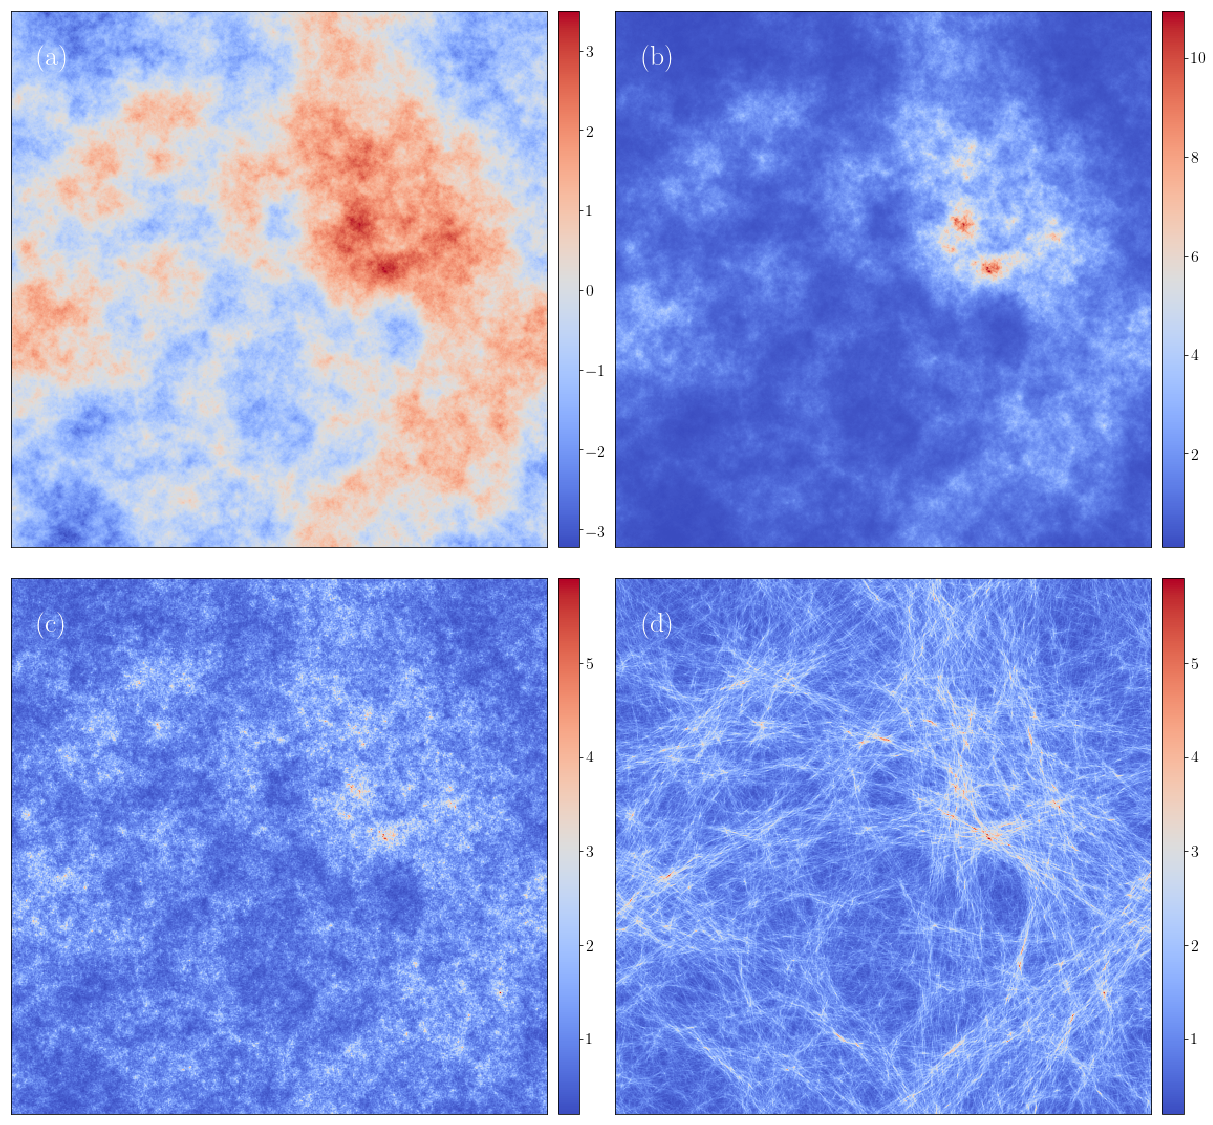

In [186]:
M = wav_k.size

fig = figure(figsize(17,16))
#cmap = 'RdYlBu_r'
cmap = 'coolwarm'

ax1 = fig.add_subplot(2,2,1)
im1 = imshow(fbm, cmap=cmap, origin='lower')
xticks([])
yticks([])
divider = make_axes_locatable(plt.gca())
cax1 = divider.append_axes("right", "4%", pad="2%")
colorbar(im1, cax=cax1)
ax1.annotate(r'(a)',xy=(25,460),color='white',fontsize=28)

ax2 = fig.add_subplot(2,2,2)
im2 = imshow(efbm, cmap=cmap, origin='lower')
xticks([])
yticks([])
divider = make_axes_locatable(plt.gca())
cax2 = divider.append_axes("right", "4%", pad="2%")
colorbar(im2, cax=cax2)
ax2.annotate(r'(b)',xy=(25,460),color='white',fontsize=28)

ax3 = fig.add_subplot(2,2,3)
im3 = imshow(misofrac, cmap=cmap, origin='lower')
xticks([])
yticks([])
divider = make_axes_locatable(plt.gca())
cax3 = divider.append_axes("right", "4%", pad="2%")
colorbar(im3, cax=cax3)
ax3.annotate(r'(c)',xy=(25,460),color='white',fontsize=28)

ax4 = fig.add_subplot(2,2,4)
im4 = imshow(mfrac, cmap=cmap, origin='lower')
xticks([])
yticks([])
divider = make_axes_locatable(plt.gca())
cax4 = divider.append_axes("right", "4%", pad="2%")
colorbar(im3, cax=cax4)
ax4.annotate(r'(d)',xy=(25,460),color='white',fontsize=28)

plt.tight_layout()
plt.savefig(figpath+'fractal_models.pdf',dpi=150,bbox_inches='tight')

## PDF calculation

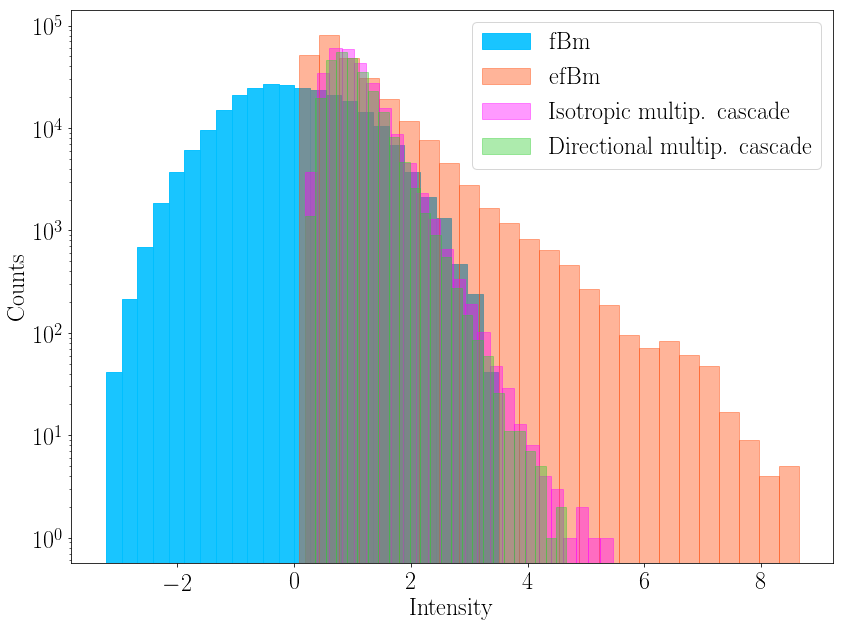

In [189]:
nbins = 25
fontsize = 24

#fbm
histo, edges = np.histogram(fbm,bins=nbins)

figure(figsize(12,9))
plt.bar(edges[:-1], histo, width=np.diff(edges), align="edge",\
        edgecolor='#00BFFF',facecolor='#00BFFF',alpha=0.9,\
        label= r'fBm')
xticks(fontsize=fontsize)
yticks(fontsize=fontsize)
xlabel(r'Intensity',fontsize=fontsize)
ylabel(r'Counts',fontsize=fontsize)

#efbm
histo, edges = np.histogram(efbm/mean(efbm),bins=nbins)

plt.bar(edges[:-1], histo, width=np.diff(edges), align="edge",\
        edgecolor='#FF4500',facecolor='#FF4500',alpha=0.4,\
        label= r'efBm')

#Iso Multiplicative cascade
histo, edges = np.histogram(misofrac/mean(misofrac),bins=nbins)

plt.bar(edges[:-1], histo, width=np.diff(edges), align="edge",\
        edgecolor='#FF00FF',facecolor='#FF00FF',alpha=0.4,\
        label= r'Isotropic multip. cascade')

plt.legend(fontsize=fontsize)

#Directional multiplicative cascade
histo, edges = np.histogram(mfrac/mean(mfrac),bins=nbins)

plt.bar(edges[:-1], histo, width=np.diff(edges), align="edge",\
        edgecolor='#32CD32',facecolor='#32CD32',alpha=0.4,\
        label= r'Directional multip. cascade')

plt.legend(fontsize=fontsize)

#plt.xscale('log')
plt.yscale('log')

plt.tight_layout()
plt.savefig(figpath+'PDF_models.pdf',dpi=150,bbox_inches='tight')

### Schematic random cascade

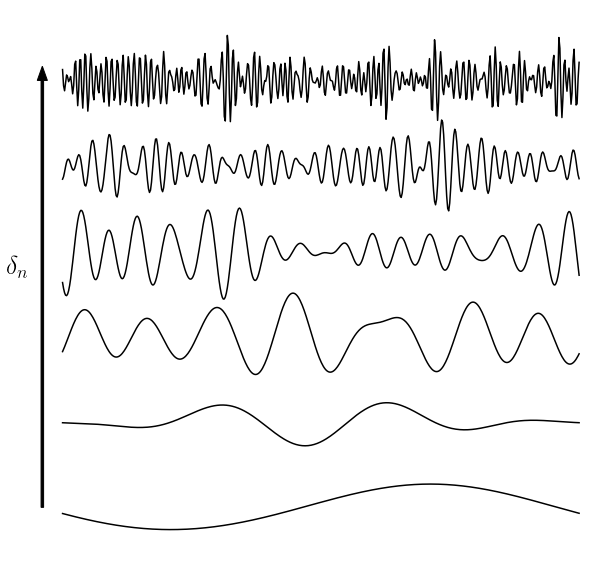

In [169]:
steps = 3

plt.figure(figsize(10,10))

for i in range(np.int(M/steps)-1):
    plt.plot(0.8 * wt[np.int(i*steps+1),0,np.int(fbm.shape[0]/2),:].real / np.std(wt[np.int(i*steps+1),0,:,:]) + (i*steps), color='black', linewidth=1.5)

#plt.axis('off')
#plt.xticks([])
#plt.yticks([])
plt.box(False)
plt.tick_params(labelbottom=False, labelleft=False, bottom=False, left=False)
plt.xlim((-40,512))
plt.arrow(-20,0,0,15, head_width=10.0, head_length=0.5, width=2.5, color='black')
plt.ylabel(r'$\delta_n$',rotation=0, fontsize=26)

plt.savefig(figpath+'cascade_cartoon.pdf',dpi=150,bbox_inches='tight')

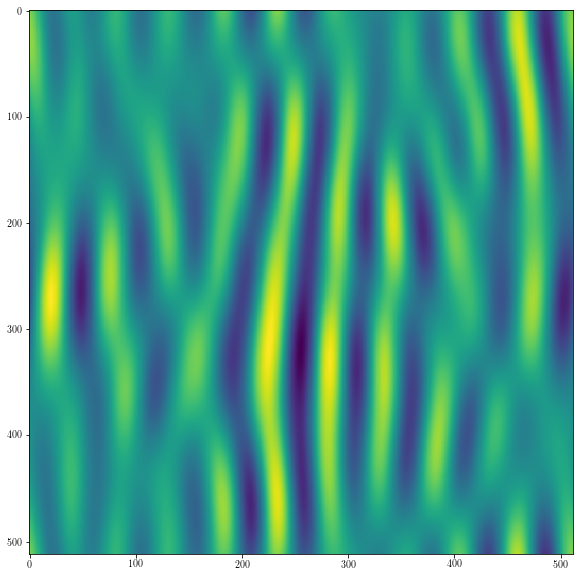

In [119]:
imshow(wt[8,0,:,:].real)